In [3]:
#Importing libraries and reading the input file
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter
import nltk
nltk.download('stopwords')
data1=pd.read_csv(r"/content/Eluvio_DS_Challenge.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
  df=pd.DataFrame(data1)
  df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,1/25/2008,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,1/25/2008,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,1/25/2008,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,1/25/2008,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,1/25/2008,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [5]:
#Performing sentiment analysis on the titles
sentiscore = []
for t in df['title']:
  s = TextBlob(t)
  sentiscore.append(s.sentiment.polarity)

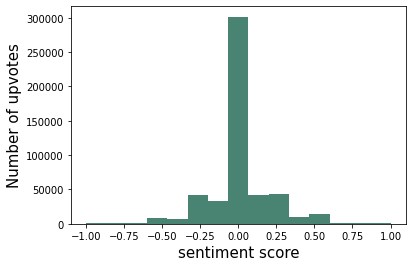

In [7]:
#Correlation of upvotes and title sentiment score
absolute_score = np.absolute(sentiscore)
rounded_score = np.around(sentiscore,1)
plt.hist(rounded_score,bins=15,color=(0.1,0.4,0.3,0.8))
plt.xlabel('sentiment score',fontsize=15)
plt.ylabel('Number of upvotes',fontsize=15)
plt.show()
corr, p_value = sc.stats.spearmanr(df['up_votes'],rounded_score)

In [8]:
#popular authors:Authors with higest upvotes
df1=df.groupby(by=['author'],as_index=False)['up_votes'].sum()
df1=df1.sort_values('up_votes')

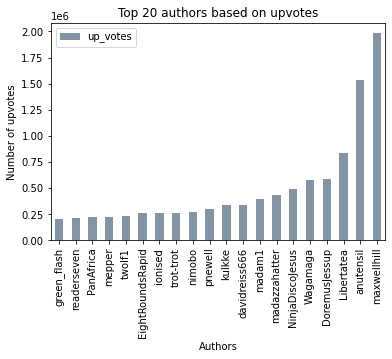

In [9]:
df1=df1[-20:]
df1.plot(x='author',y='up_votes',kind='bar',color=(0.2,0.3,0.4,0.6))
plt.xlabel('Authors')
plt.title('Top 20 authors based on upvotes')
plt.ylabel('Number of upvotes')
plt.show()

In [10]:
over18=[]
for l in df['over_18']:
  over18.append(l==True)

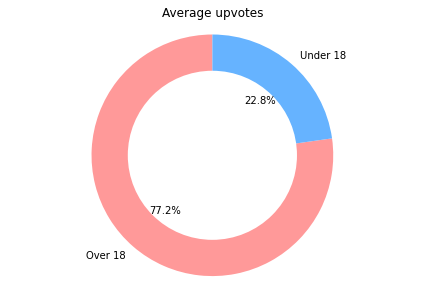

In [11]:
#Piechart of average votes based on age
upvotes_list=df['up_votes']
over18_upvotes = 0
under18_upvotes = 0
for i in range(len(over18)):
    if over18[i]:
        over18_upvotes += upvotes_list[i]
    else:
        under18_upvotes += upvotes_list[i]
over18_upvotes /= np.sum(over18)
under18_upvotes /= (len(over18)-np.sum(over18))

a=[np.sum(over18),len(over18)-np.sum(over18)]
b=[round(over18_upvotes,1), round(under18_upvotes,1)]
labels=['Number of posts', 'Average upvotes']

labels = ['Over 18', 'Under 18']
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(b, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Average upvotes')
plt.show()

In [12]:
#Finding most used words by the top author
tokenizer = RegexpTokenizer('[\w]+')
subreddit_words = []
dfx=df1[-1:]
dfx=dfx.author.tolist()
all_titles=''
for i,x in df.iterrows():
    if(x['author'].lower() in dfx):
        if(len(x['title'])<=200):
          all_titles = all_titles+x['title'].lower()
words = list(tokenizer.tokenize(all_titles))
words = [q for q in words if q not in stopwords.words('english')]
subreddit_words.append(words)
print(Counter(words).most_common(10))
print()

['maxwellhill']
[('us', 191), ('uk', 172), ('police', 170), ('new', 160), ('says', 159), ('government', 138), ('world', 127), ('people', 122), ('court', 98), ('one', 96)]



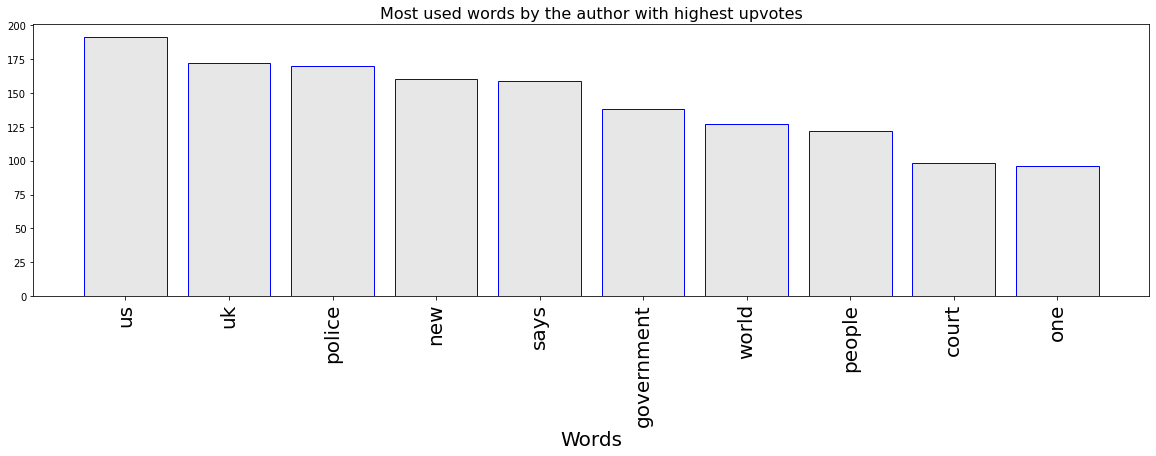

In [13]:
#Most used words by the top author plotting
ll1=Counter(words).most_common(10)
top=20
plt.bar(*zip(*ll1),0.8,color=(0.1, 0.1, 0.1, 0.1),edgecolor='blue')
plt.xticks(rotation=90,fontsize=20)
fig = plt.gcf()
plt.xlabel("Words", fontsize=20)
fig.set_size_inches(top, 5)
plt.title("Most used words by the author with highest upvotes",fontsize=16)
plt.show()

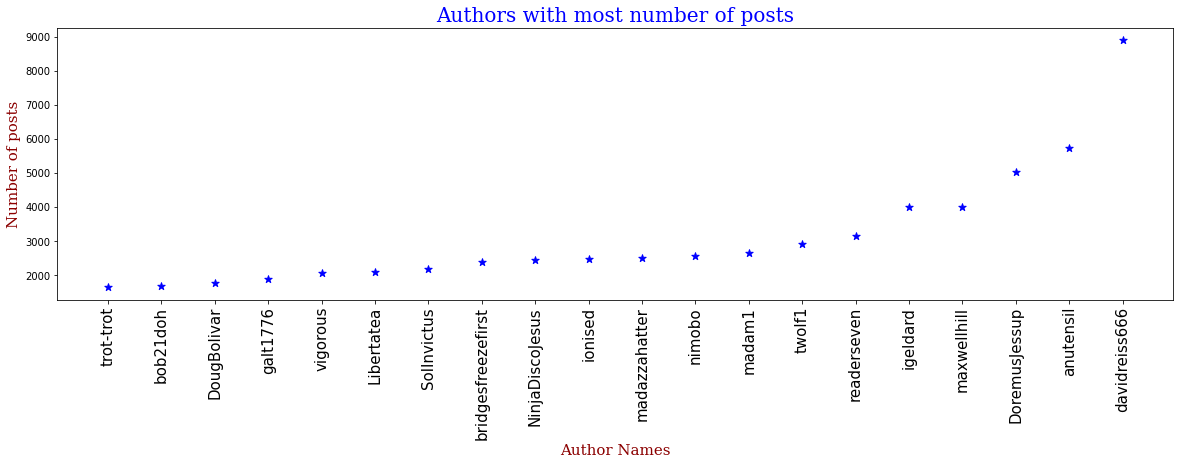

In [26]:
#Authors with more number of posts
df11=df.groupby(by=['author'],as_index=False)['title'].count()
df11=df11.sort_values('title')
df11=df11[-20:]
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
df11.plot(x='author',y='title',kind='scatter',marker='*',color='blue',s=60)
plt.xlabel('Author Names',fontdict=font2,)
plt.xticks(rotation=90,fontsize=15)
fig = plt.gcf()
fig.set_size_inches(top, 5)
plt.title('Authors with most number of posts',fontdict=font1)
plt.ylabel('Number of posts',fontdict=font2)
plt.show()